In [21]:
import sympy as sym
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

## Question 1: Application of Differentiation in AI Model Optimization

### Consider a machine learning model where the loss function is given by L(x, y) = e**(x**2 + y**2) + cos(xy). Your task is to:

### (a) Find the partial derivatives ∂L\∂x and ∂L\∂y

In [22]:
# Initializing the given function
x, y = sym.symbols('x, y')
L = exp(x**2 + y**2) + cos(x * y)
L

exp(x**2 + y**2) + cos(x*y)

In [23]:
#Find the partial derivatives ∂L/∂x and ∂L/∂y .
dL_dx = sym.diff(L, x)
dL_dy = sym.diff(L, y)
print("differentiation by x:", dL_dx)
print("differentiation by y:", dL_dy)


differentiation by x: 2*x*exp(x**2 + y**2) - y*sin(x*y)
differentiation by y: -x*sin(x*y) + 2*y*exp(x**2 + y**2)


### (b) Write a Python function that computes the gradient vector for a given input (x, y).

In [24]:
#gadient Vector
grad_function = sym.lambdify((x,y),[dL_dx,dL_dy],"numpy")
x_val, y_val = 1.0, 1.0
gradient_at_point = grad_function(x_val, y_val)
print(f"Gradient at ({x_val}, {y_val}): {gradient_at_point}")


Gradient at (1.0, 1.0): [13.936641213053404, 13.936641213053404]


### (c) Use Matplotlib to visualize the loss function as a 3D surface plot over the range x, y ∈ [−2, 2].

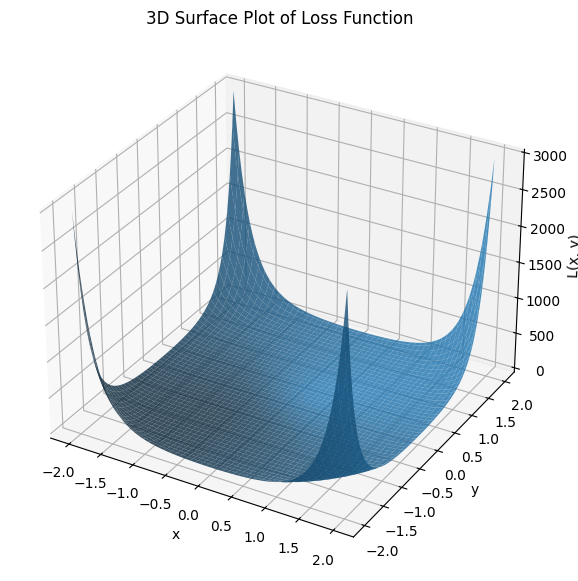

In [25]:

# Define the loss function as a numerical function
loss_function = sym.lambdify((x, y), L, "numpy")

# Create a grid of x and y values
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluate the loss function on the grid
Z = loss_function(X, Y)

# Plot the 
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.8)
ax.set_title("3D Surface Plot of Loss Function")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("L(x, y)")


plt.show()


### (d) Discuss the significance of gradient vectors in model optimization, particularly in gradient descent methods.

#### Significance of Gradient Vectors in Gradient Descent Methods

Gradient vectors are essential in gradient descent optimization techniques, which are widely used for training machine learning models. In the context of gradient descent, the primary objective is to minimize the loss function, and the gradient vector plays a central role in this process by guiding the updates to model parameters.

The gradient vector indicates the direction of the steepest increase in the loss function, while the **negative gradient** points in the direction of the steepest decrease. In gradient descent, this negative gradient is used to update the model parameters iteratively, moving them closer to values that minimize the loss function. The update rule for the parameters is given by:

\[
\theta = \theta - \eta \nabla L(\theta)
\]

where \( \theta \) represents the model parameters, \( \eta \) is the learning rate, and \( \nabla L(\theta) \) is the gradient of the loss function. This update step ensures that the model progressively improves, reducing the loss over time.

One of the key advantages of using gradient vectors is their adaptability to the local landscape of the loss function. In complex, high-dimensional optimization problems, the gradient vector allows the gradient descent algorithm to adjust its steps based on the varying steepness of the function. When the gradient is large, indicating that the model is far from the optimal parameters, the algorithm can take larger steps to converge more quickly. Conversely, when the gradient is small, the algorithm reduces its step size, allowing for finer adjustments as it approaches the minimum.

Moreover, the gradient computation is highly efficient, especially in deep learning, where techniques like backpropagation enable fast and scalable gradient calculation. This efficiency makes it feasible to train complex models on large datasets. The magnitude of the gradient also controls the convergence of the algorithm, as a large gradient indicates that the model is far from the minimum, prompting a larger update, while a small gradient suggests the model is nearing the minimum, encouraging smaller, more precise updates.

In non-convex loss functions, where there may be multiple local minima, gradient descent can help navigate toward better solutions. Although the algorithm can sometimes get stuck in local minima, stochastic gradient descent (SGD) introduces randomness, helping the optimizer escape local minima and explore other regions of the parameter space.

Overall, gradient vectors are fundamental to gradient descent methods, guiding the optimization process by indicating the direction and rate of change of the loss function. This enables machine learning models to efficiently minimize their loss function and learn from data.



## Question 2: Integration for Signal Processing
### The amplitude of a signal A(t) can be modeled by the function A(t) = 2*t**2*e**(-t) on the interval 𝑡∈[0,4]




### (a) Use the Python library SymPy to compute the definite integral of  2*t**2*e**(-t) over the interval  ∈[0,4]


In [26]:
t = sym.symbols('t')
A_t = 2 * t**2 * sym.exp(-t)
A_t

2*t**2*exp(-t)

In [27]:
integral = sym.integrate(A_t, (t, 0, 4))
integral

4 - 52*exp(-4)

### (b) Plot the function A(t) using Matplotlib and annotate the graph with the area under the curve corresponding to the integral.

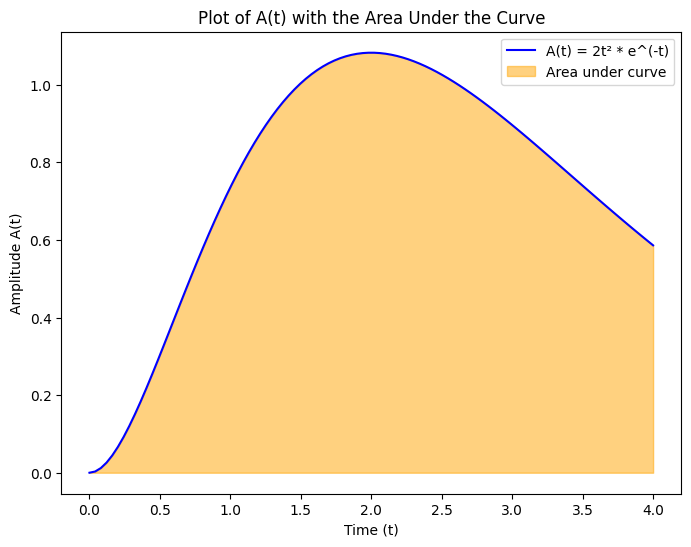

In [30]:


# Define the function A(t)
def A(t):
    return 2 * t**2 * np.exp(-t)  # Use NumPy's exp function

# Generate values for t in the range [0, 4]
t_val = np.linspace(0, 4, 100)
a_val = A(t_val)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(t_val, a_val, color='blue', label='A(t) = 2t² * e^(-t)')
plt.fill_between(t_val, a_val, where=(t_val >= 0) & (t_val <= 4), color='orange', alpha=0.5, label='Area under curve')

# Add labels and title
plt.title("Plot of A(t) with the Area Under the Curve")
plt.xlabel("Time (t)")
plt.ylabel("Amplitude A(t)")
plt.legend()

# Show the plot
plt.show()


(c) Interpret the meaning of the computed integral in the context of signal energy.

The definite integral 
𝑅 = ∫ 2 * t**2 * np.exp(-t) dt represents the total energy of the signal 
𝐴(𝑡) over the time intervalt∈[0,4].

In signal processing, the energy E of a signal is given by the integral of its amplitude squared over time. In this case, the integral represents the accumulated "energy" of the signal over the interval from 0 to 4.

The value of the integral gives the total amount of energy that is "contained" in the signal from time t=0 to t=4. This could be useful for understanding how much power is present in the signal during that time period.

The graph visually represents this area under the curve, which corresponds to the integral, showing how the signal's amplitude behaves over time. The area under the curve reflects the signal's contribution to its total energy over the specified range.